## Prepare the Data

In [1]:
pip install path

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Initial imports
import pandas as pd
from pathlib import Path

In [3]:
# Loading the data into Pandas DataFrame
myopia = pd.read_csv('myopia.csv')
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# List dataframe data types
myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [6]:
labels = myopia['MYOPIC']
print(labels)

0      1
1      0
2      0
3      1
4      0
      ..
613    1
614    0
615    0
616    0
617    0
Name: MYOPIC, Length: 618, dtype: int64


In [7]:
# Remove the MYOPIC column
myopia = myopia.drop(columns = ['MYOPIC'])
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [8]:
# Remove columns with null values
for column in myopia.columns:
    print(f"Column {column} has {myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [9]:
# Remove duplicate entries
print(f"Duplicate entries: {myopia.duplicated().sum()}")

Duplicate entries: 0


In [10]:
# Since the data types are numeric values, none of the columns need to be transformed into another data type

In [11]:
myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia)
scaled_data[0:2]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ]])

In [13]:
new_myopia = pd.DataFrame(scaled_data, columns = myopia.columns)
new_myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


In [14]:
# Saving cleaned data
file_path = Path("myopia_data_cleaned.csv")
new_myopia.to_csv(file_path, index=False)

## Apply Dimensionality Reduction 

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [16]:
# Set up the PCA model to reflect 90% of the variance 
pca = PCA(n_components =.90)

In [17]:
# Fit the PCA model on to the scaled data
df_pca = pca.fit_transform(scaled_data)
df_pca[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386])

In [18]:
# Transform the PCA data into a DataFrame
df_myopia_pca = pd.DataFrame(data = df_pca, columns = ['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6',
                                                      'PC_7', 'PC_8', 'PC_9', 'PC_10'])
df_myopia_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [19]:
# Fetch the explained variance 
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

## PCA Explained Variance

In [20]:
# import dependencies
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [21]:
# Initialize t_SNE model
tsne = TSNE(learning_rate= 35, perplexity= 50)

# Reduce dataset dimensions with t_SNE and inspect result
tsne_features = tsne.fit_transform(df_myopia_pca)

# Shape tsne dataset
tsne_features.shape

(618, 2)

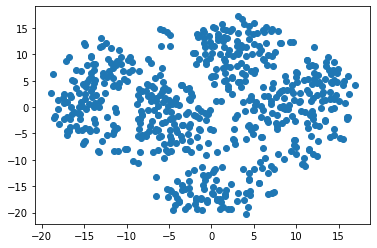

In [22]:
# Plot scatter plot
df_myopia_pca['x'] = tsne_features[:,0]
df_myopia_pca['y']= tsne_features[:,1]

plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

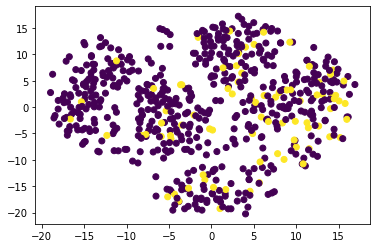

In [23]:
# Plot scatter plot
df_myopia_pca['x'] = tsne_features[:,0]
df_myopia_pca['y']= tsne_features[:,1]

plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= labels)
plt.show()

In [24]:
# Use value_counts() to tell how many clusters there are
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

## Analysis

In [29]:
# Finding the best value for k
inertia = []

# Number of clusters to test which are your k-values
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for value in k:
    # Set up kmeans model
    model = KMeans(n_clusters = value, random_state = 42)
    
    # Fit the model into a DataFrame
    model.fit(df_myopia_pca)
    
    # Calculate and extract the intertia and then store that into an array
    inertia.append(model.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
                   
# Creating the DataFrame for the Elbow Curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,106348.105450
1,2,65475.083432
2,3,39196.676467
3,4,29226.301710
4,5,23297.227431


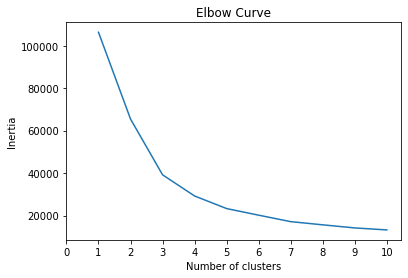

In [30]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Predicting the best k-value

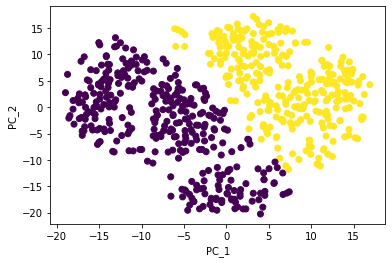

In [39]:
# Plot using k= 2
get_clusters(2, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.show()
    
show_clusters(df_myopia_pca)

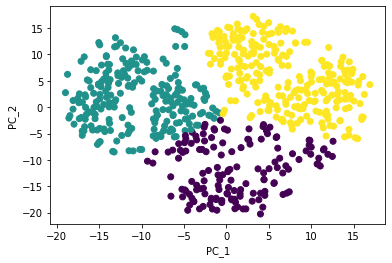

In [38]:
# Plot using k= 3
get_clusters(3, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.show()
    
show_clusters(df_myopia_pca)

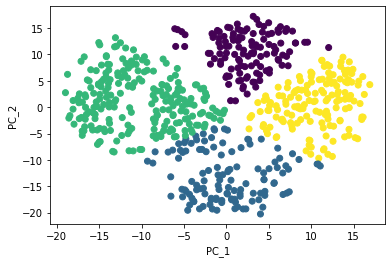

In [43]:
# Plot using k= 4
get_clusters(4, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.show()
    
show_clusters(df_myopia_pca)

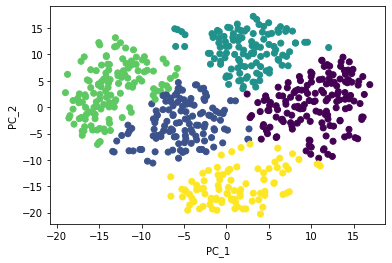

In [40]:
# Plot using k= 5
get_clusters(5, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.show()
    
show_clusters(df_myopia_pca)

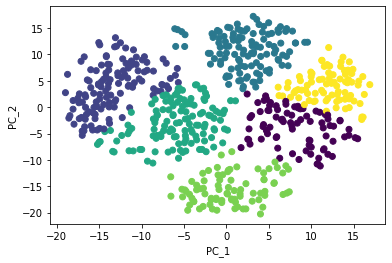

In [42]:
# Plot using k= 6
get_clusters(6, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.show()
    
show_clusters(df_myopia_pca)

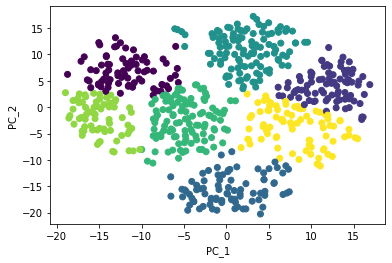

In [41]:
# Plot using k= 7
get_clusters(7, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.show()
    
show_clusters(df_myopia_pca)

## Recommendation

Using the Elbow Curve plot, the best k-value is where the intertia slows down near to 5. Scatter plots with varying k-values were plotted to determine the number of outcomes with the highest accuracy. It is recommended that the optimal number of clusters be between 3-5.